<p align="center">
  <strong><h2>TITANIC SURVIVAL PREDICTION</h2></strong>
</p>

<img src="titanic.jpg" alt="Titanic Image" />
The Titanic was a British passenger liner that sank in the North Atlantic Ocean during its maiden voyage on April 15, 1912. The ship was traveling from Southampton, England, to New York City, United States. Among the passengers were third-class and first-class passengers, as well as crew members.

The Titanic sank after colliding with an iceberg, resulting in the deaths of most of the third-class passengers and some of the crew members. However, the ship's lifeboats were not enough to accommodate all the passengers, leading to a significant number of fatalities.

In this project, a dataset was given containining the records of some of the passengers of the Titanic to use to build a model that predicts whether a passenger on the Titanic survived or not. 


### Importing the libraries

In [200]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder
import seaborn as sns

### Loading the data

In [300]:
# Load the data for preparation
titanic_df = pd.read_csv('tested.csv')

### Exploring the data

In [161]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Survived     418 non-null    int64  
 2   Pclass       418 non-null    int64  
 3   Name         418 non-null    object 
 4   Sex          418 non-null    object 
 5   Age          332 non-null    float64
 6   SibSp        418 non-null    int64  
 7   Parch        418 non-null    int64  
 8   Ticket       418 non-null    object 
 9   Fare         417 non-null    float64
 10  Cabin        91 non-null     object 
 11  Embarked     418 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 39.3+ KB


<p> The above shows that the dataset has 418 entries ad 12 columns divided into 5 integers, 5 objects and 2 floats. Also observed that the value of Age is float. This need to be normalised.

In [162]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,0.363636,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.481622,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,0.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,0.000000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,0.000000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,1.000000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,1.000000,3.000000,76.000000,8.000000,9.000000,512.329200


#### Handle for missing values

In [301]:
# Determine missing values
missing_values = titanic_df.isnull().sum()

# Calculate the percentage of missing values
total_values = titanic_df.shape[0]
percentage_missing = (missing_values / total_values) * 100

# Create a summary table
titanic_df_summary_table = pd.DataFrame({'Missing Values': missing_values, 'Percentage Missing': percentage_missing})

print(titanic_df_summary_table)

             Missing Values  Percentage Missing
PassengerId               0            0.000000
Survived                  0            0.000000
Pclass                    0            0.000000
Name                      0            0.000000
Sex                       0            0.000000
Age                      86           20.574163
SibSp                     0            0.000000
Parch                     0            0.000000
Ticket                    0            0.000000
Fare                      1            0.239234
Cabin                   327           78.229665
Embarked                  0            0.000000


<p> From the above, we can see that age column has a missing values of 86 which is 21% of the entries and the cabin column has a massive missing values of 327 out of the 418 entries.</p>
<p>To be able to analyze this dataset, 86 rows with missing values in age column will be dropped. However, the cabin column will be dropped as removing 327 rows with the missing values will significantly affect the data.</p>

In [303]:

# Remove rows with null values in the Age and Fare columns. Also convert age values from float to int 
titanic_df = titanic_df.dropna(subset=['Age', 'Fare'])

# Convert the Age values to integer
titanic_df['Age'] = titanic_df['Age'].astype(int)


### Drop irrelevant columns

In [302]:
# Drop Cabin Column
titanic_df = titanic_df.drop(['Name', 'Cabin', 'Ticket'], axis=1)

In [278]:
# Encode categorical variables
titanic_df = pd.get_dummies(titanic_df, columns=['Sex', 'Embarked'], drop_first=True, prefix=['Sex', 'Embarked'])

In [304]:
titanic_df.rename(columns={'Sex_1': 'Sex'}, inplace=True)

In [305]:
titanic_df

,PassengerId,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Embarked
0,892,0,3,male,34,0,0,7.8292,Q
1,893,1,3,female,47,1,0,7.0000,S
2,894,0,2,male,62,0,0,9.6875,Q
3,895,0,3,male,27,0,0,8.6625,S
4,896,1,3,female,22,1,1,12.2875,S
...,...,...,...,...,...,...,...,...,...
409,1301,1,3,female,3,1,1,13.7750,S
411,1303,1,1,female,37,1,0,90.0000,Q
412,1304,1,3,female,28,0,0,7.7750,S
414,1306,1,1,female,39,0,0,108.9000,C


### Spliting data into features and target variable as well as into training and testing sets

In [280]:
# Split data into features and target variable
X = titanic_df.drop(['Survived'], axis=1)
y = titanic_df['Survived']

# Split data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

### The model

Accuracy: 100.00%
              precision    recall  f1-score   support

           0       1.00      1.00      1.00        45
           1       1.00      1.00      1.00        22

    accuracy                           1.00        67
   macro avg       1.00      1.00      1.00        67
weighted avg       1.00      1.00      1.00        67

Confusion Matrix:
 [[45  0]
 [ 0 22]]


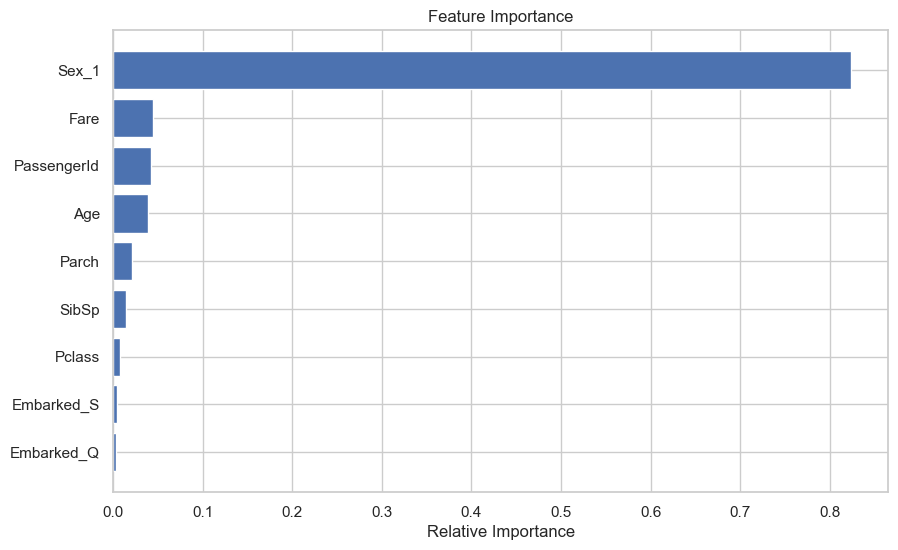

In [282]:
# Model Selection
model = RandomForestClassifier(n_estimators=100, random_state=42)

# Model Training
model.fit(X_train, y_train)

# Model Evaluation
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print("Accuracy: {:.2f}%".format(accuracy * 100))
print(classification_report(y_test, y_pred))
conf_matrix = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:\n", conf_matrix)

# Visualization and Interpretation
importances = model.feature_importances_
features = X.columns
indices = np.argsort(importances)

plt.figure(figsize=(10, 6))
plt.title("Feature Importance")
plt.barh(range(len(indices)), importances[indices], align="center")
plt.yticks(range(len(indices)), [features[i] for i in indices])  # Remove `, 0` from range
plt.xlabel("Relative Importance")
plt.show()

### Data Visualisation

#### The number of passengers in the Titanic (Male/Female)

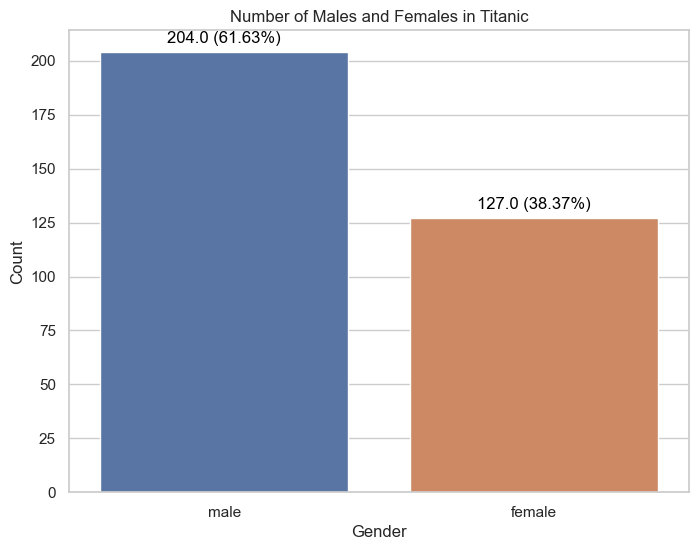

In [294]:
# Map the values 0 and 1 to 'female' and 'male'
titanic_df['Gender'] = titanic_df['Sex'].map({0: 'female', 1: 'male'})

sns.set(style="whitegrid")
plt.figure(figsize=(8, 6))
ax = sns.countplot(data=titanic_df, x='Gender')  # Use 'Gender' instead of 'Sex'
plt.xlabel("Gender")
plt.ylabel("Count")
plt.title("Number of Males and Females in Titanic")

total = len(titanic_df)
for p in ax.patches:
    height = p.get_height()
    ax.annotate(f'{height} ({height/total*100:.2f}%)', (p.get_x() + p.get_width() / 2., height),
                ha='center', va='center', fontsize=12, color='black', xytext=(0, 10),
                textcoords='offset points')

plt.show()

<p> There are were more males passengers than females

#### Age distribution of the passengers according to their gender

<Figure size 1000x600 with 0 Axes>

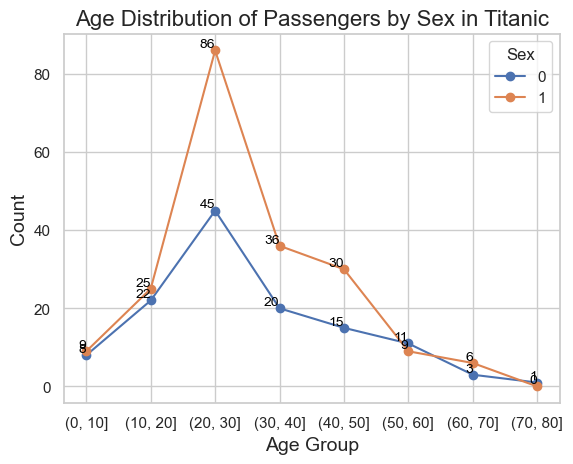

In [295]:
age_bins = [0, 10, 20, 30, 40, 50, 60, 70, 80]
titanic_df['Age Group'] = pd.cut(titanic_df['Age'], bins=age_bins)
age_sex_pivot = titanic_df.pivot_table(index='Age Group', columns='Sex', aggfunc='size', fill_value=0)
plt.figure(figsize=(10, 6))
sns.set(style="whitegrid")
lines = age_sex_pivot.plot(kind='line', marker='o')
for line in lines.get_lines():
    xdata, ydata = line.get_data()
    for x, y in zip(xdata, ydata):
        plt.text(x, y, f"{y}", ha='right', va='bottom', fontsize=10, color='black')
plt.xlabel("Age Group", fontsize=14)
plt.ylabel("Count", fontsize=14)
plt.title("Age Distribution of Passengers by Sex in Titanic", fontsize=16)
plt.legend(title="Sex")

plt.show()

<p>The above shows that there were more passengers belonging to 20 to 40 age group both males and females.</p>
<p>It also shows that there were children on board the Titanic below the 10 years of age.</p>

#### Are there survivors among the Titanic passengers?

<p>Let's check the data once again</p>

In [296]:
titanic_df.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare,Sex,Embarked_Q,Embarked_S
count,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000,331.000000
mean,1100.232628,0.383686,2.141994,30.151057,0.483384,0.398792,40.982087,0.616314,0.066465,0.685801
std,122.910180,0.487019,0.846251,14.129321,0.875004,0.811582,61.228558,0.487019,0.249471,0.464899
min,892.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,992.500000,0.000000,1.000000,21.000000,0.000000,0.000000,8.050000,0.000000,0.000000,0.000000
50%,1100.000000,0.000000,2.000000,27.000000,0.000000,0.000000,16.000000,1.000000,0.000000,1.000000
75%,1210.500000,1.000000,3.000000,39.000000,1.000000,1.000000,40.633350,1.000000,0.000000,1.000000
max,1307.000000,1.000000,3.000000,76.000000,8.000000,6.000000,512.329200,1.000000,1.000000,1.000000


<p>The above shows that there are, indeed, passengers who survived, which is about 36% of the passengers in the dataset. A cursory look at the dataset as described above also shows that there were passengers below the age of 1 and those of 76 years old</p>

<p>Now, let do some statistics to show how many passengers survived, their age and sex and what may have contributed to their survival</p>

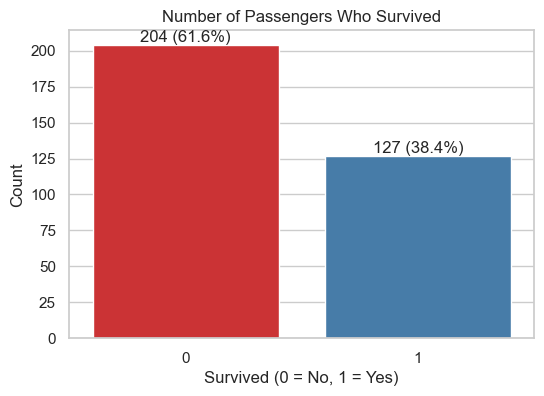

In [297]:
# Count the number of survivors and non-survivors
survivor_counts = titanic_df['Survived'].value_counts()

# Calculate the percentages
percentages = survivor_counts / survivor_counts.sum() * 100

plt.figure(figsize=(6, 4))
ax = sns.barplot(x=survivor_counts.index, y=survivor_counts.values, palette='Set1')
plt.title("Number of Passengers Who Survived")
plt.xlabel("Survived (0 = No, 1 = Yes)")
plt.ylabel("Count")

# Adding data labels above the bars with count and percentage
for i, (count, percent) in enumerate(zip(survivor_counts, percentages)):
    label = f'{count} ({percent:.1f}%)'
    ax.text(i, count, label, ha='center', va='bottom', fontsize=12)

plt.show()


#### Gender and age distribution of the survivors

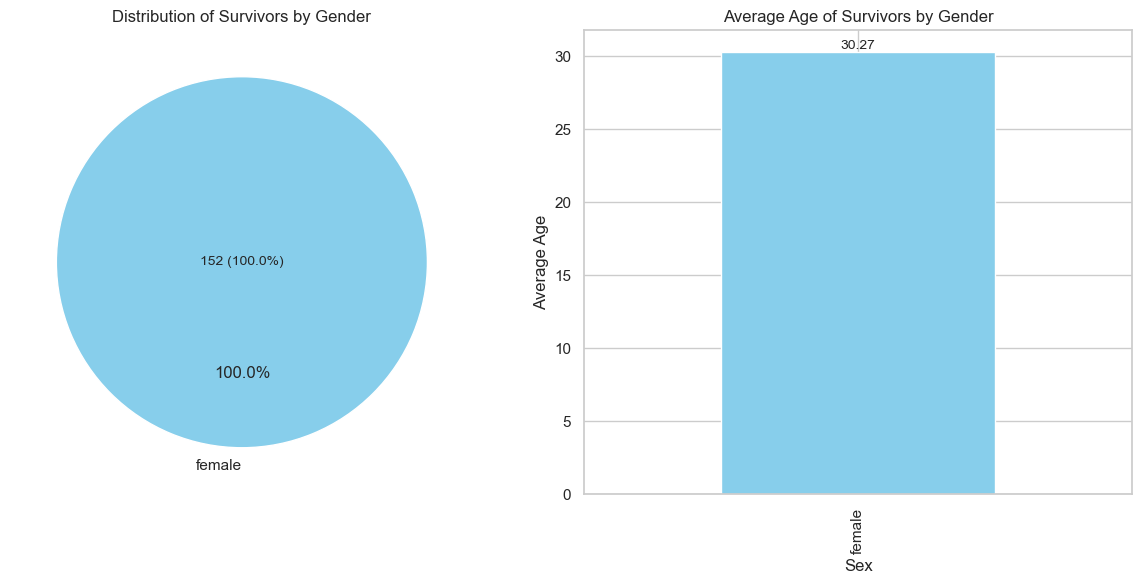

In [298]:
# Group by 'Sex' and calculate the count
survivor_counts = survivors['Sex'].value_counts()

# Calculate the average age of survivors by gender
survivor_age = survivors.groupby('Sex')['Age'].mean()


fig, axes = plt.subplots(1, 2, figsize=(12, 6))

# Plot 1: Pie chart for Survivors by Gender
labels = survivor_counts.index
sizes = survivor_counts.values
colors = ['skyblue', 'lightcoral']

axes[0].pie(sizes, labels=labels, colors=colors, autopct='%1.1f%%', startangle=90)
axes[0].set_title("Distribution of Survivors by Gender")

# Plot 2: Bar chart for Average Age of Survivors by Gender
survivor_age.plot(kind='bar', ax=axes[1], color=['skyblue', 'lightcoral'])
axes[1].set_title("Average Age of Survivors by Gender")
axes[1].set_ylabel("Average Age")

# Adding  data labels to the pie chart
for label, size in zip(labels, sizes):
    axes[0].annotate(f'{size} ({size/sum(sizes)*100:.1f}%)', xy=(0, 0), fontsize=10, ha='center', va='center')
for index, value in enumerate(survivor_age):
    axes[1].text(index, value, f'{value:.2f}', ha='center', va='bottom', fontsize=10)

plt.tight_layout()
plt.show()


From the dataset given, 152 passengers survived with an average age of 30 years old

### Additional factors contributing to the passengers' survival

<p>Does Passenger Class (Pclass), Number of Siblings/Spouses (SibSp), Number of Parents/Children (Parch), and Port of Embarkation (Embarked) influences the rate of survival?

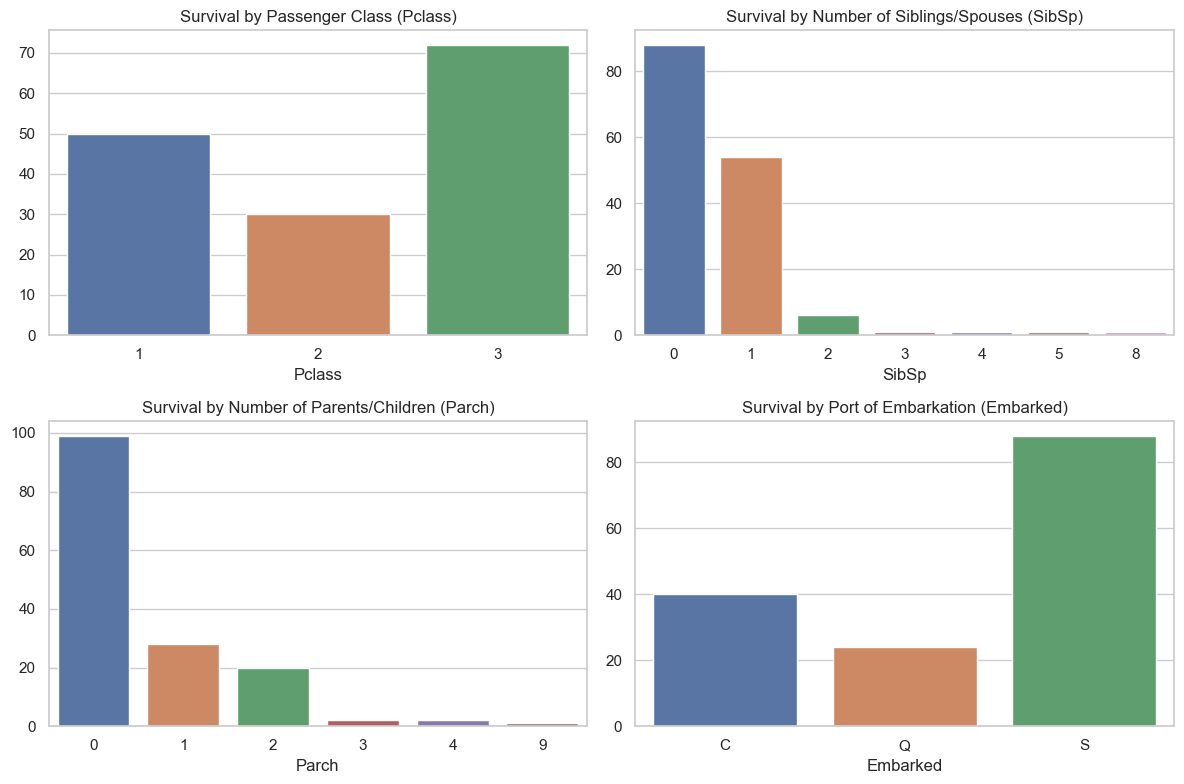

In [299]:
fig, axes = plt.subplots(2, 2, figsize=(12, 8))

# Visualize Survival by Passenger Class (Pclass)
pclass_survival = survivors['Pclass'].value_counts().sort_index()
sns.barplot(x=pclass_survival.index, y=pclass_survival.values, ax=axes[0, 0])
axes[0, 0].set_title("Survival by Passenger Class (Pclass)")
axes[0, 0].set_xlabel("Pclass")

# Visualize Survival by Number of Siblings/Spouses (SibSp)
sibsp_survival = survivors['SibSp'].value_counts().sort_index()
sns.barplot(x=sibsp_survival.index, y=sibsp_survival.values, ax=axes[0, 1])
axes[0, 1].set_title("Survival by Number of Siblings/Spouses (SibSp)")
axes[0, 1].set_xlabel("SibSp")

# Visualize Survival by Number of Parents/Children (Parch)
parch_survival = survivors['Parch'].value_counts().sort_index()
sns.barplot(x=parch_survival.index, y=parch_survival.values, ax=axes[1, 0])
axes[1, 0].set_title("Survival by Number of Parents/Children (Parch)")
axes[1, 0].set_xlabel("Parch")

# Visualize Survival by Port of Embarkation (Embarked)
embarked_survival = survivors['Embarked'].value_counts().sort_index()
sns.barplot(x=embarked_survival.index, y=embarked_survival.values, ax=axes[1, 1])
axes[1, 1].set_title("Survival by Port of Embarkation (Embarked)")
axes[1, 1].set_xlabel("Embarked")

plt.tight_layout()
plt.show()


The above provide valuable insights into the factors that influenced the chances of survival among Titanic passengers with a clear understanding of how different circumstances and passenger characteristics affected survival rates.

**Survival by Passenger Class (Pclass)**
- 1st and 3rd Class passengers have a relatively high likelihood  and a better chance of survival than those in the 2nd class

**Survival by Number of Siblings/Spouses (SibSp)**
- Passengers with 0 or fewer siblings/spouses on board had a high chance of survival 

**Survival by Number of Parents/Children on board (Parch)**
- Passengers with 0 parents/children on board had a 91% chance of survival, illustrating a high likelihood of survival for individuals traveling without parents or children.

**Survival by Port of Embarkation (Embarked)**
- Passengers who embarked at Southampton (S) had the highest survival rate at 90%, demonstrating a relatively better chance of survival for passengers departing from this port.
